<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 23.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127442 entries, 0 to 188592
Data columns (total 15 columns):
address         127442 non-null object
attributes      127442 non-null object
business_id     127442 non-null object
categories 

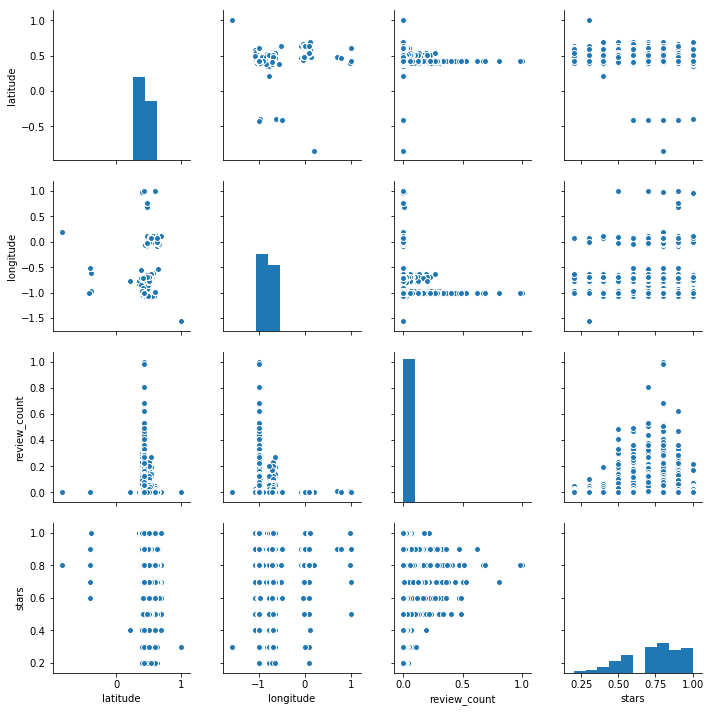

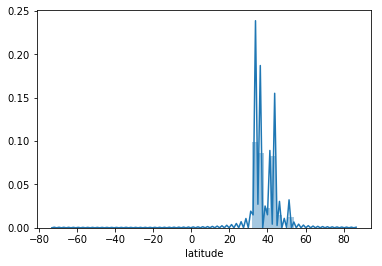

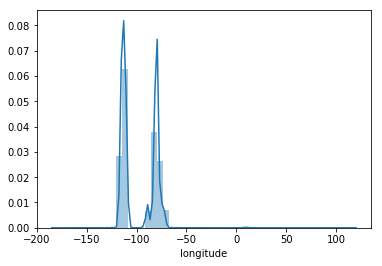

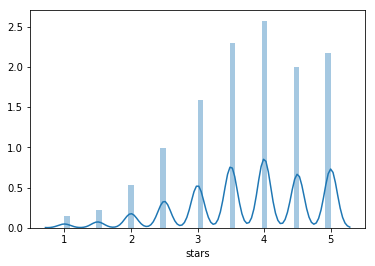

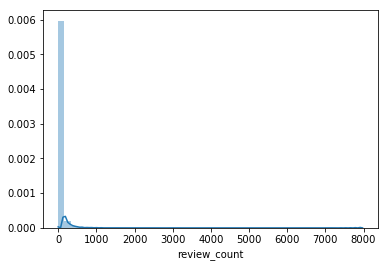

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

business_df = pd.read_json('business.json',lines=True)
business_df.info()

business_df = business_df.dropna()

business_df['review_count']=business_df['review_count'].fillna(0)
business_df['stars']=business_df['stars'].fillna(0)

business_df.describe()
stars = business_df.groupby('stars').mean()
stars.corr()

business_df.info()

numeric_features = business_df.loc[:, ['latitude', 'longitude', 'review_count', 'stars']]
numeric_features_standardized = (numeric_features)/numeric_features.max()
ax = sns.pairplot(numeric_features_standardized)
plt.show()

ax = sns.distplot(business_df['latitude'])
plt.show()
ax = sns.distplot(business_df['longitude'])
plt.show()
ax = sns.distplot(business_df['stars'])
plt.show()
ax = sns.distplot(business_df['review_count'])
plt.show()

In [2]:
business_df["stars"].value_counts()

4.0    26230
3.5    23367
5.0    22177
4.5    20339
3.0    16157
2.5    10125
2.0     5386
1.5     2227
1.0     1434
Name: stars, dtype: int64

In [3]:
business_df = business_df.rename(columns={'id': 'business_id'})
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156638 entries, 0 to 156638
Data columns (total 15 columns):
address         156638 non-null object
attributes      156638 non-null object
business_id     156638 non-null object
categories      156638 non-null object
city            156638 non-null object
hours           156638 non-null object
is_open         156638 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156638 non-null object
neighborhood    156638 non-null object
postal_code     156638 non-null object
review_count    156638 non-null int64
stars           156638 non-null float64
state           156638 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 19.1+ MB


In [10]:
import pandas as pd

from pandas.io.json import json_normalize #package for flattening json in pandas df

with open('checkin.json', 'r') as f:
    data = f.readlines()

data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"

data_df = pd.read_json(data_json_str)
print(data_df["time"])

0         {'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...
1         {'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...
2         {'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...
3                   {'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}
4         {'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...
5                                {'Sat-17': 1, 'Sat-18': 1}
6         {'Sun-0': 1, 'Thu-0': 1, 'Sun-1': 1, 'Sat-15':...
7         {'Fri-2': 1, 'Fri-11': 1, 'Thu-11': 3, 'Mon-12...
8         {'Fri-0': 1, 'Sat-0': 1, 'Sun-0': 1, 'Thu-0': ...
9                                {'Thu-15': 1, 'Sat-23': 1}
10                  {'Sat-11': 1, 'Fri-13': 1, 'Thu-14': 1}
11        {'Mon-0': 1, 'Sat-0': 1, 'Fri-1': 1, 'Sun-1': ...
12        {'Fri-0': 1, 'Sun-0': 1, 'Thu-0': 1, 'Wed-0': ...
13        {'Tue-0': 2, 'Wed-0': 1, 'Wed-2': 1, 'Mon-10':...
14                                            {'Thu-18': 1}
15                                            {'Sat-16': 1}
16        {'Thu-14': 1, 'Sat-15': 1, 'Mo

In [20]:
temp = []
i = 0
for days in data_df["time"]:
    count = 0
    for key, value in days.items():
        count = count + int(value)
    temp.append(count)

data_df["checkin_count"] = temp
            
print(data_df["checkin_count"].unique())
data_df.info()

[ 151    7    6 ..., 1648 1618 5569]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 157075 entries, 0 to 157074
Data columns (total 3 columns):
business_id      157075 non-null object
time             157075 non-null object
checkin_count    157075 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.8+ MB


In [21]:
df_merged = business_df.merge(data_df, on=('business_id'), suffixes=('_l', '_r'))
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 17 columns):
address          110403 non-null object
attributes       110403 non-null object
business_id      110403 non-null object
categories       110403 non-null object
city             110403 non-null object
hours            110403 non-null object
is_open          110403 non-null int64
latitude         110403 non-null float64
longitude        110403 non-null float64
name             110403 non-null object
neighborhood     110403 non-null object
postal_code      110403 non-null object
review_count     110403 non-null int64
stars            110403 non-null float64
state            110403 non-null object
time             110403 non-null object
checkin_count    110403 non-null int64
dtypes: float64(3), int64(3), object(11)
memory usage: 15.2+ MB


In [23]:
new_df = df_merged[['business_id','review_count', 'stars', 'checkin_count', 'city', 'state', 'neighborhood', 'categories']]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 8 columns):
business_id      110403 non-null object
review_count     110403 non-null int64
stars            110403 non-null float64
checkin_count    110403 non-null int64
city             110403 non-null object
state            110403 non-null object
neighborhood     110403 non-null object
categories       110403 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 7.6+ MB


In [24]:
new_df.stars = new_df.stars.round()

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
new_df["stars"].value_counts()

4.0    64221
2.0    15405
3.0    15121
5.0    14837
1.0      819
Name: stars, dtype: int64

In [26]:
new_df['review_count']=new_df['review_count'].fillna(0)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
cols_to_norm = ['review_count', 'checkin_count']
new_df[cols_to_norm] = new_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
new_df['state'] = label_encoder.fit_transform(new_df['state'])
print(new_df)

                   business_id  review_count  stars  checkin_count  \
0       Apn5Q_b6Nz61Tq4XzPdf9A      0.002637    4.0       0.000202   
1       AjEbIBw6ZFfln7ePHha9PA      0.000000    4.0       0.000000   
2       O8S5hYJ1SMc8fA4QBtVujA      0.000251    4.0       0.000043   
3       8USyCYqpScwiNEb58Bt6CA      0.000126    2.0       0.000007   
4       45bWSZtniwPRiqlivpS8Og      0.007533    4.0       0.005662   
5       8-NRKkPY1UiFXW20WXKiXg      0.004645    2.0       0.000924   
6       UTm5QZThPQlT35mkAcGOjg      0.000000    4.0       0.000051   
7       KapTdGyGs7RK0c68Z6hhhg      0.001130    2.0       0.000043   
8       tZnSodhPwNr4bzrwJ1CSbw      0.017954    4.0       0.001062   
9       _c3ixq9jYKxhLUB0czi0ug      0.034401    4.0       0.007120   
10      o_zDURWzgt5yM5HW_xGJsg      0.000000    4.0       0.000000   
11      r89Re4FNgVWHgBfjCVZyVw      0.001130    4.0       0.000108   
12      vJIuDBdu01vCA8y1fwR1OQ      0.000000    2.0       0.000000   
13      5J3b7j3Fzo9I

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
label_encoder = preprocessing.LabelEncoder()
new_df['city'] = label_encoder.fit_transform(new_df['city'])
print(new_df)

                   business_id  review_count  stars  checkin_count  city  \
0       Apn5Q_b6Nz61Tq4XzPdf9A      0.002637    4.0       0.000202    95   
1       AjEbIBw6ZFfln7ePHha9PA      0.000000    4.0       0.000000   250   
2       O8S5hYJ1SMc8fA4QBtVujA      0.000251    4.0       0.000043   426   
3       8USyCYqpScwiNEb58Bt6CA      0.000126    2.0       0.000007    95   
4       45bWSZtniwPRiqlivpS8Og      0.007533    4.0       0.005662   539   
5       8-NRKkPY1UiFXW20WXKiXg      0.004645    2.0       0.000924    26   
6       UTm5QZThPQlT35mkAcGOjg      0.000000    4.0       0.000051   552   
7       KapTdGyGs7RK0c68Z6hhhg      0.001130    2.0       0.000043   358   
8       tZnSodhPwNr4bzrwJ1CSbw      0.017954    4.0       0.001062   738   
9       _c3ixq9jYKxhLUB0czi0ug      0.034401    4.0       0.007120   539   
10      o_zDURWzgt5yM5HW_xGJsg      0.000000    4.0       0.000000    95   
11      r89Re4FNgVWHgBfjCVZyVw      0.001130    4.0       0.000108   426   
12      vJIu

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [32]:
label_encoder = preprocessing.LabelEncoder()
new_df['neighborhood'] = label_encoder.fit_transform(new_df['neighborhood'])
print(new_df)

                   business_id  review_count  stars  checkin_count  city  \
0       Apn5Q_b6Nz61Tq4XzPdf9A      0.002637    4.0       0.000202    95   
1       AjEbIBw6ZFfln7ePHha9PA      0.000000    4.0       0.000000   250   
2       O8S5hYJ1SMc8fA4QBtVujA      0.000251    4.0       0.000043   426   
3       8USyCYqpScwiNEb58Bt6CA      0.000126    2.0       0.000007    95   
4       45bWSZtniwPRiqlivpS8Og      0.007533    4.0       0.005662   539   
5       8-NRKkPY1UiFXW20WXKiXg      0.004645    2.0       0.000924    26   
6       UTm5QZThPQlT35mkAcGOjg      0.000000    4.0       0.000051   552   
7       KapTdGyGs7RK0c68Z6hhhg      0.001130    2.0       0.000043   358   
8       tZnSodhPwNr4bzrwJ1CSbw      0.017954    4.0       0.001062   738   
9       _c3ixq9jYKxhLUB0czi0ug      0.034401    4.0       0.007120   539   
10      o_zDURWzgt5yM5HW_xGJsg      0.000000    4.0       0.000000    95   
11      r89Re4FNgVWHgBfjCVZyVw      0.001130    4.0       0.000108   426   
12      vJIu

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [33]:
new_df.drop(['neighborhood'], axis=1, inplace=True)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 7 columns):
business_id      110403 non-null object
review_count     110403 non-null float64
stars            110403 non-null float64
checkin_count    110403 non-null float64
city             110403 non-null int64
state            110403 non-null int64
categories       110403 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 6.7+ MB


In [35]:
X = new_df[['review_count', 'checkin_count', 'city', 'state']]
y = new_df[['stars']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 4 columns):
review_count     110403 non-null float64
checkin_count    110403 non-null float64
city             110403 non-null int64
state            110403 non-null int64
dtypes: float64(2), int64(2)
memory usage: 4.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110403 entries, 0 to 110402
Data columns (total 1 columns):
stars    110403 non-null float64
dtypes: float64(1)
memory usage: 1.7 MB


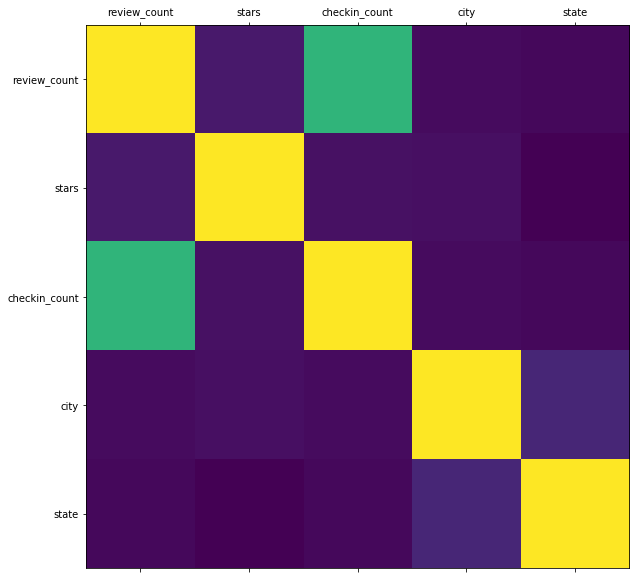

In [36]:
corr = new_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

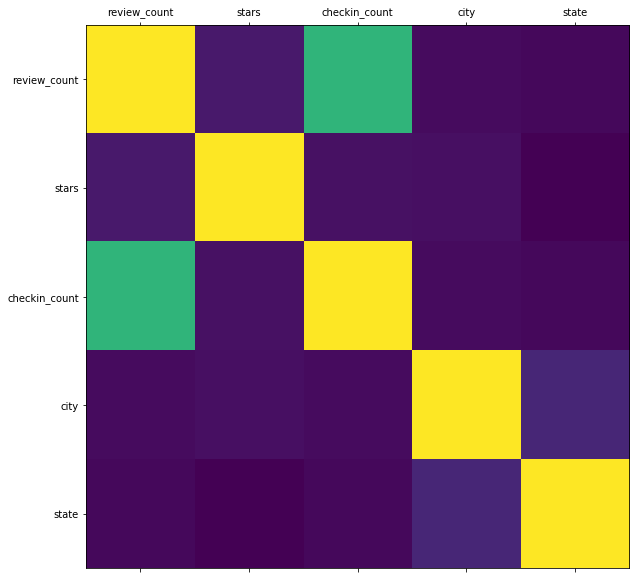

In [38]:
corr = new_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

plt.show()

In [39]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [40]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
   
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

regression_model.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

import math
math.sqrt(regression_model_mse)

The intercept for our model is 3.69473135096687


0.8980026440692358

In [41]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict)
)

,0,1,2,3,4
0,0,38,19,93,46
1,25,625,516,2253,433
2,8,574,577,2318,297
3,58,2145,2216,10163,1400
4,42,505,334,2043,873


In [42]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict)
)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,0,1,2,3,4
0,0,3,0,155,38
1,0,8,1,3674,169
2,0,3,1,3655,115
3,0,14,6,15473,489
4,0,10,1,3153,633


In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


0.45324444766493965

In [44]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=1.0, solver='auto')
ridge.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = ridge.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:810: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.57892829969928628

In [45]:
from sklearn.neighbors import NearestCentroid
cneigh = NearestCentroid(metric='euclidean', shrink_threshold=None)
cneigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = cneigh.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21955726241802834

In [46]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100, ), activation='logistic', alpha=0.001, learning_rate='adaptive')
neural.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neural.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.57892829969928628

In [47]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = nb.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.57903699141335463

In [48]:
from sklearn.svm import LinearSVC

svc = LinearSVC(penalty='l2', loss='squared_hinge')
svc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = svc.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.57892829969928628

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(multi_class='multinomial')
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.57903699141335463

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

/Users/Mudit/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, y)

y_predict = clf.predict(X_test)
print accuracy_score(y_test, y_predict)

clf.support_vectors_

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, y)

y_predict = lin_clf.predict(X_test)
accuracy_score(y_test, y_predict)

In [ ]:
new_df.to_csv('yelp_data', sep='\t')

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=10000.0)
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

In [ ]:
temp = []
i = 0
for category in new_df["categories"]:
    if 'Restaurants' in category:
        temp.append(i)
    i += 1
        
print temp

In [ ]:
print new_df.index.tolist()

In [ ]:
rest_df = new_df.iloc[temp]
rest_df.info()
rest_df.to_csv('restaurants_data', sep='\t')

In [ ]:
new_list = list(set(reduce(lambda x, y: x+y, rest_df["categories"])))
print new_list

In [ ]:
rest_df.groupby([rest_df['state']]).count()

In [ ]:
rest_df[["state","city","review_count", "checkin_count", "stars"]].plot(kind='hist',subplots=True, figsize=(12, 6),bins=100);

In [ ]:
plt.show()

In [ ]:
rest_df = rest_df.cumsum()

plt.figure(); rest_df.plot();

In [ ]:
rest_df.plot.barh(stacked=True);

In [ ]:
plt.figure();

rest_df.plot.hist(stacked=True, bins=20)